### CASA0002_Urban simulation
# Random Graphs, Degree distribution and Small World
---

Valentina Marin 

March 2023

In [1]:
#importing the networkx library 
import networkx as nx 

#importing the matplotlib library for plotting the graph 
import matplotlib.pyplot as plt 

# 1. Random graphs

How to generate randomness in a network? 
We are going to have a look at two models today, the __Erdős–Rényi model__ and the __Barabási–Albert model__.

### Erdős-Rényi graph

We will create a $G(n, p)$ model where $n$ is the number of nodes and $p$ is the probability for a link between any two nodes


In [2]:
### nx.erdos_renyi_graph(n, p)
# Returns a $G_{n,p}$ random graph

### Parameters:
# n (int) – The number of nodes to be created
# p (float) – Probability for edge creation.

In [3]:
?nx.erdos_renyi_graph

Signature:
nx.erdos_renyi_graph(
    n,
    p,
    seed=None,
    directed=False,
    *,
    backend=None,
    **backend_kwargs,
)
Docstring:
Returns a $G_{n,p}$ random graph, also known as an Erdős-Rényi graph
or a binomial graph.

The $G_{n,p}$ model chooses each of the possible edges with probability $p$.

Parameters
----------
n : int
    The number of nodes.
p : float
    Probability for edge creation.
seed : integer, random_state, or None (default)
    Indicator of random number generation state.
    See :ref:`Randomness<randomness>`.
directed : bool, optional (default=False)
    If True, this function returns a directed graph.

See Also
--------
fast_gnp_random_graph

Notes
-----
This algorithm [2]_ runs in $O(n^2)$ time.  For sparse graphs (that is, for
small values of $p$), :func:`fast_gnp_random_graph` is a faster algorithm.

:func:`binomial_graph` and :func:`erdos_renyi_graph` are
aliases for :func:`gnp_random_graph`.

>>> nx.binomial_graph is nx.gnp_random_graph
True
>>> nx

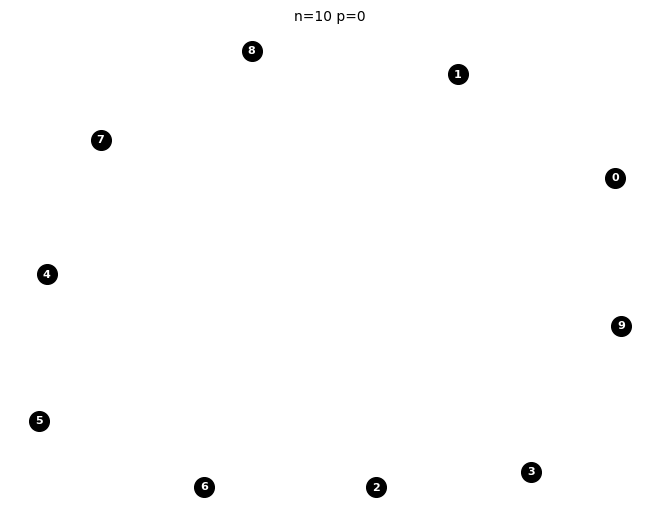

In [4]:
ER_1= nx.erdos_renyi_graph(10,0) 
# Here we are creating a graph with 10 nodes(n) and 0% probability (p) of any two nodes having an edge

nx.draw(ER_1, with_labels=True,
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1)
plt.title("n=10 p=0",fontsize=10)
plt.show() 

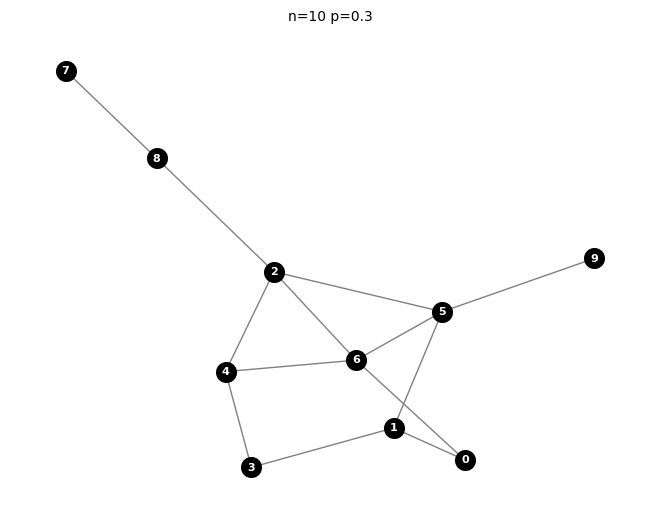

In [41]:
ER_2=nx.erdos_renyi_graph(10,0.3) 

# A graph with 10 nodes(n) and 30% probability (p) of any two nodes having an edge

nx.draw(ER_2, with_labels=True,
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1) 
plt.title("n=10 p=0.3",fontsize=10)
plt.show()

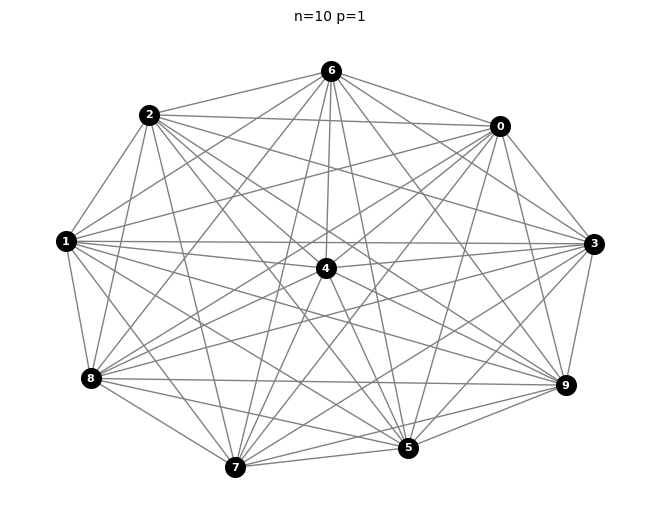

In [6]:
ER_3= nx.erdos_renyi_graph(10,1) 

# A graph with 10 nodes(n) and 100% probability (p) of any two nodes having an edge

nx.draw(ER_3, with_labels=True,       
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1)
plt.title("n=10 p=1",fontsize=10)
plt.show() 

In [7]:
## The graph above is a fully connected network!!! 

__If we run a code with the same parameters many times, we will get different graphs with the same number of nodes and probability of having edges but most likely a different configuration.__

Let's try it! 

In the following code we have set the parameters having __10__ nodes (n) and the probability for creating edges of __25%__ (p).

In [8]:
## Here we use a for loop for iterating over the sequence of graph generation.
## We are creating 20 graphs using the same parameters.
## Let's see if they look the same !

ER_graphs = [nx.erdos_renyi_graph(10,0.25) for _ in range(20)]
len(ER_graphs)

20

In [9]:
ER_graphs # in this list we stored the 20 random graphs we have created

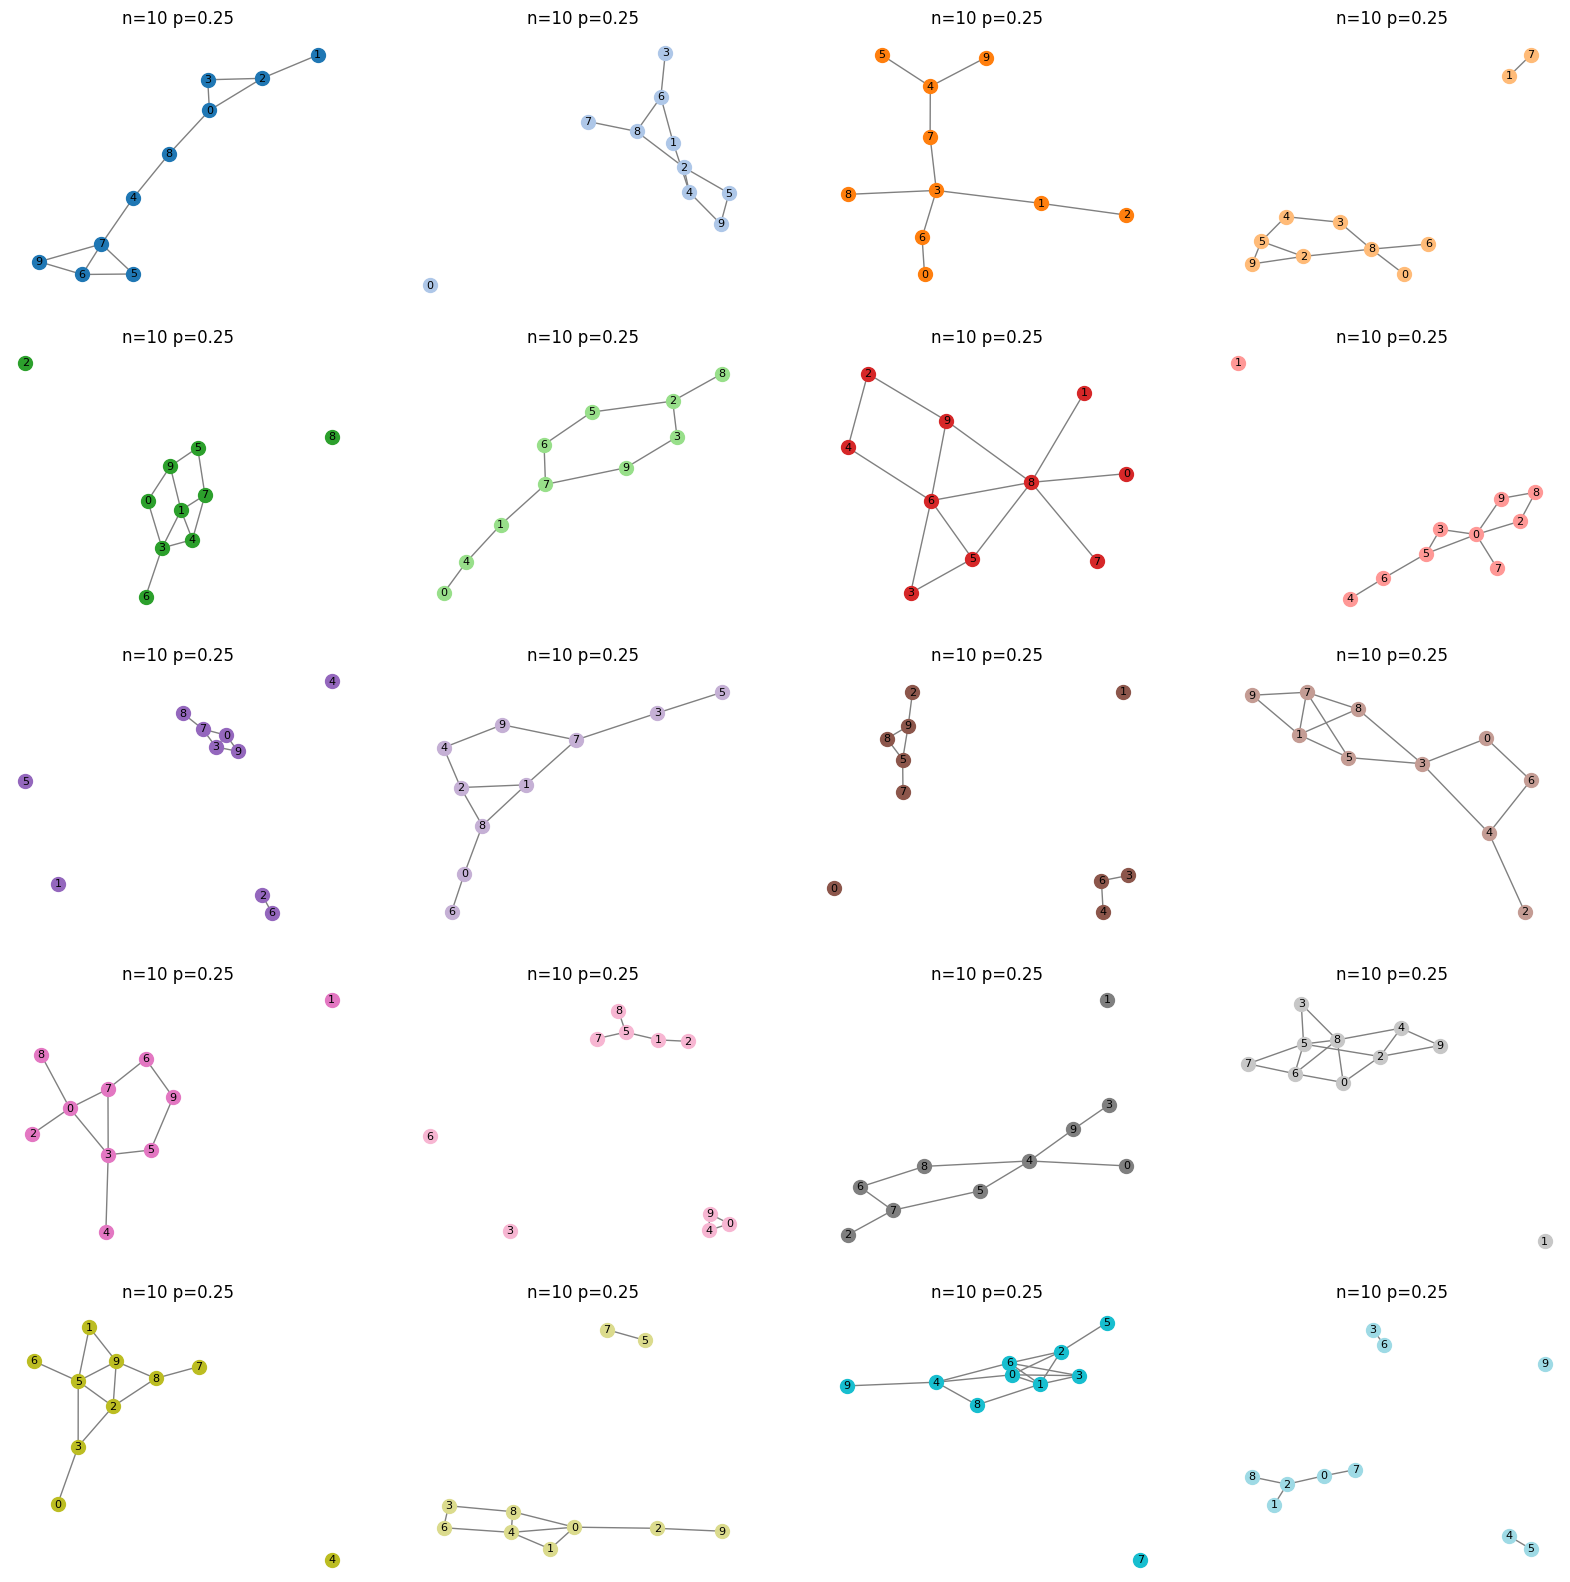

In [10]:
# The following code is just for visualisation purposes. We can plot all the graphs together:
import numpy as np

color={}
cm = plt.get_cmap("tab20")
for i in range(20):
    color[i]=cm(i/20)

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
ax = axes.flatten()

for i in range(20):
    nx.draw_networkx(ER_graphs[i], ax=ax[i],
                     with_labels=True, 
                     node_size=100, 
                     font_size=8, 
                     font_color="k",
                     node_color=np.atleast_2d(color[i]),
                     edge_color='grey',
                     width=1)
    ax[i].set_axis_off()
    ax[i].set_title("n=10 p=0.25")

plt.show()




### Barabási–Albert model

We will create a graph with a total of $n$ nodes by preferentially attaching nodes each with $m$ edges to the nodes that have the higher degree $k_i$.

The probability of selecting node $i$ is defined by:  $\Pi_{i}= \frac {k_{i}}{\sum_{j}{k_{j}}}$



In [11]:
### nx.barabasi_albert_graph(n, m)
# Returns a random graph according to the Barabási–Albert preferential attachment model.

### Parameters:
# n (int) – The number of nodes to be created
# m (float) – Number of edges to attach from a new node to existing nodes
# When setting the parameters remember that 1 <= m < n


Barabási-Albert (BA) graph is a type of random graph model that is designed to capture the properties of real-world networks, particularly those exhibiting _scale-free behavior_. The model was introduced by Réka Albert and Albert-László Barabási in 1999.

Here's a detailed explanation of the Barabási-Albert graph:

__Network Growth__: The Barabási-Albert model is based on the idea of network growth. The network starts with a small number of nodes and grows over time by adding new nodes.

__Preferential Attachment__: One of the key features of the Barabási-Albert model is preferential attachment. This means that new nodes in the network prefer to attach themselves to existing nodes that already have a __high degree__ (i.e., many connections). This concept reflects the "rich get richer" principle seen in many real-world networks where popular nodes tend to attract more connections.

Mathematical Representation: Mathematically, the Barabási-Albert model can be described as follows:

Start with a small number of nodes (often denoted as m0).
At each time step t, add a new node with m (where m < m0) edges that link the new node to existing nodes.
The probability Π that a new node will connect to an existing node i is proportional to the degree ki of node i. It can be expressed as Π(i) = ki / Σj kj, where the sum is taken over all existing nodes in the network.
Power Law Degree Distribution: As a result of the preferential attachment mechanism, the degree distribution of nodes in a Barabási-Albert graph follows a power law distribution. This means that there are __a few highly connected nodes (hubs) and many nodes with only a few connections__. This property is characteristic of many real-world networks, such as social networks, citation networks, and the World Wide Web.

Scale-Free Network: The Barabási-Albert graph is a type of scale-free network, meaning that its degree distribution follows a scale-free power law. In contrast to random networks where most nodes have a similar degree, in scale-free networks, there are a few highly connected nodes (hubs) that play a critical role in the network's structure and function.

Overall, the Barabási-Albert model provides a simple yet powerful framework for understanding the emergence of scale-free networks and capturing important properties of various real-world networks. It has applications in diverse fields such as computer science, sociology, biology, and economics.

In [42]:
?nx.barabasi_albert_graph

Signature:
nx.barabasi_albert_graph(
    n,
    m,
    seed=None,
    initial_graph=None,
    *,
    backend=None,
    **backend_kwargs,
)
Docstring:
Returns a random graph using Barabási–Albert preferential attachment

A graph of $n$ nodes is grown by attaching new nodes each with $m$
edges that are preferentially attached to existing nodes with high degree.

Parameters
----------
n : int
    Number of nodes
m : int
    Number of edges to attach from a new node to existing nodes
seed : integer, random_state, or None (default)
    Indicator of random number generation state.
    See :ref:`Randomness<randomness>`.
initial_graph : Graph or None (default)
    Initial network for Barabási–Albert algorithm.
    It should be a connected graph for most use cases.
    A copy of `initial_graph` is used.
    If None, starts from a star graph on (m+1) nodes.

Returns
-------
G : Graph

Raises
------
NetworkXError
    If `m` does not satisfy ``1 <= m < n``, or
    the initial graph number of nodes

1 represents the number of edges attached from a new node to existing nodes. 

a parameter controls the number of connections each new node makes to existing nodes. This parameter is often denoted as m. The value of m is typically less than the initial number of nodes m0. For example, if m0 = 10 and m = 3, then each new node will connect to 3 existing nodes in the network.

This implies that during the construction of this graph, each new node will connect to only one existing node in the network. Consequently, the degree of each node in the graph will vary between 1 and 20, depending on the order of node additions and their connections.

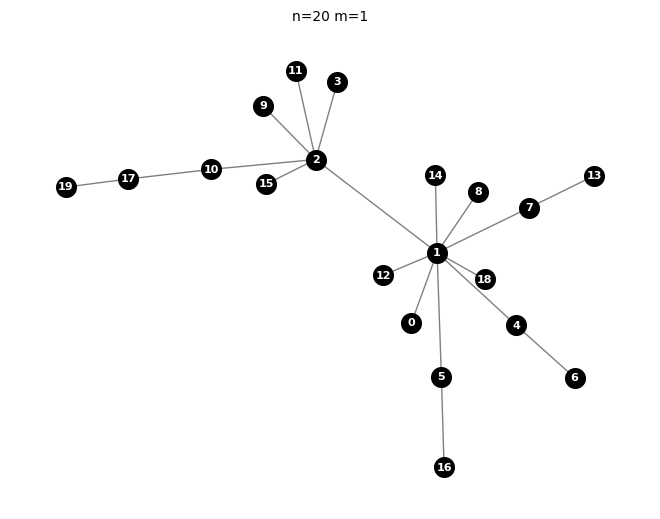

In [43]:
BA_1=nx.barabasi_albert_graph(20,1) 

# Here we are creating a graph with a total of 20 nodes(n) by attaching 1 edge (m) from a new node to existing nodes

nx.draw(BA_1, with_labels=True,
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1) 
plt.title("n=20 m=1",fontsize=10)
plt.show()

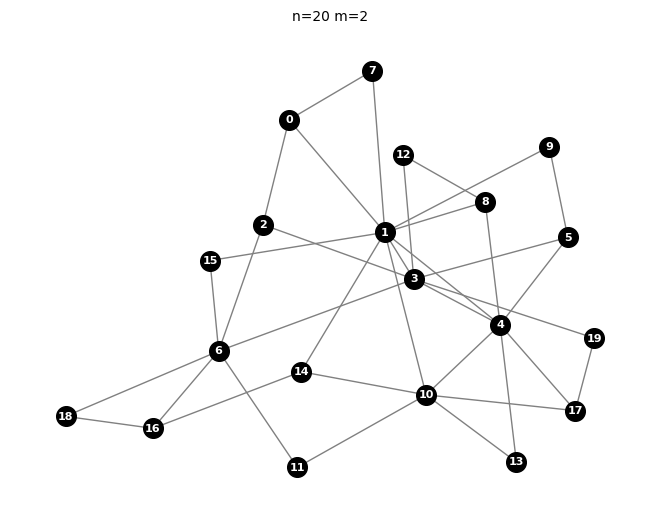

In [44]:
BA_2=nx.barabasi_albert_graph(20,2) 

# A graph with a total of 20 nodes(n) by attaching 2 edges (m) from a new node to existing nodes.

nx.draw(BA_2, with_labels=True,
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1)
plt.title("n=20 m=2",fontsize=10)
plt.show()

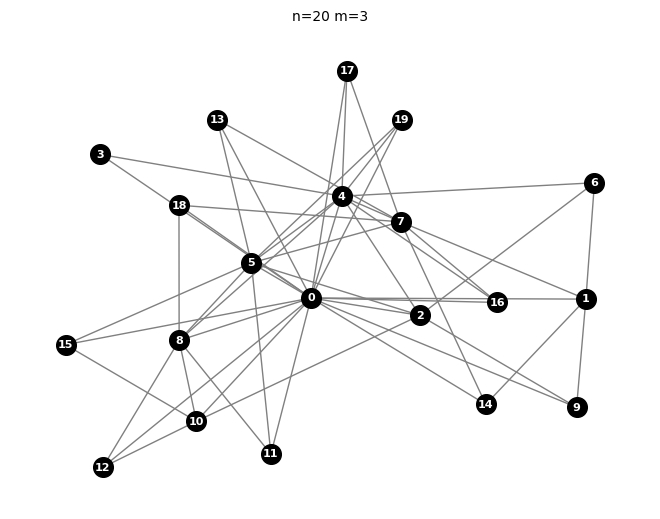

In [15]:
BA_3=nx.barabasi_albert_graph(20,3) 

# A graph with a total of 20 nodes(n) by attaching 3 edges (m) from a new node to existing nodes

nx.draw(BA_3, with_labels=True,
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1) 
plt.title("n=20 m=3",fontsize=10)
plt.show()

In [45]:
## Here we use a for loop for iterating over the sequence of graph generation.
## We are creating 20 graphs using the same parameters.
## Let's see if they look the same !

BA_graphs = [nx.barabasi_albert_graph(15,1) for _ in range(20)]

len(BA_graphs)

20

In [17]:
BA_graphs # in this list we stored the 20 random graphs we have created

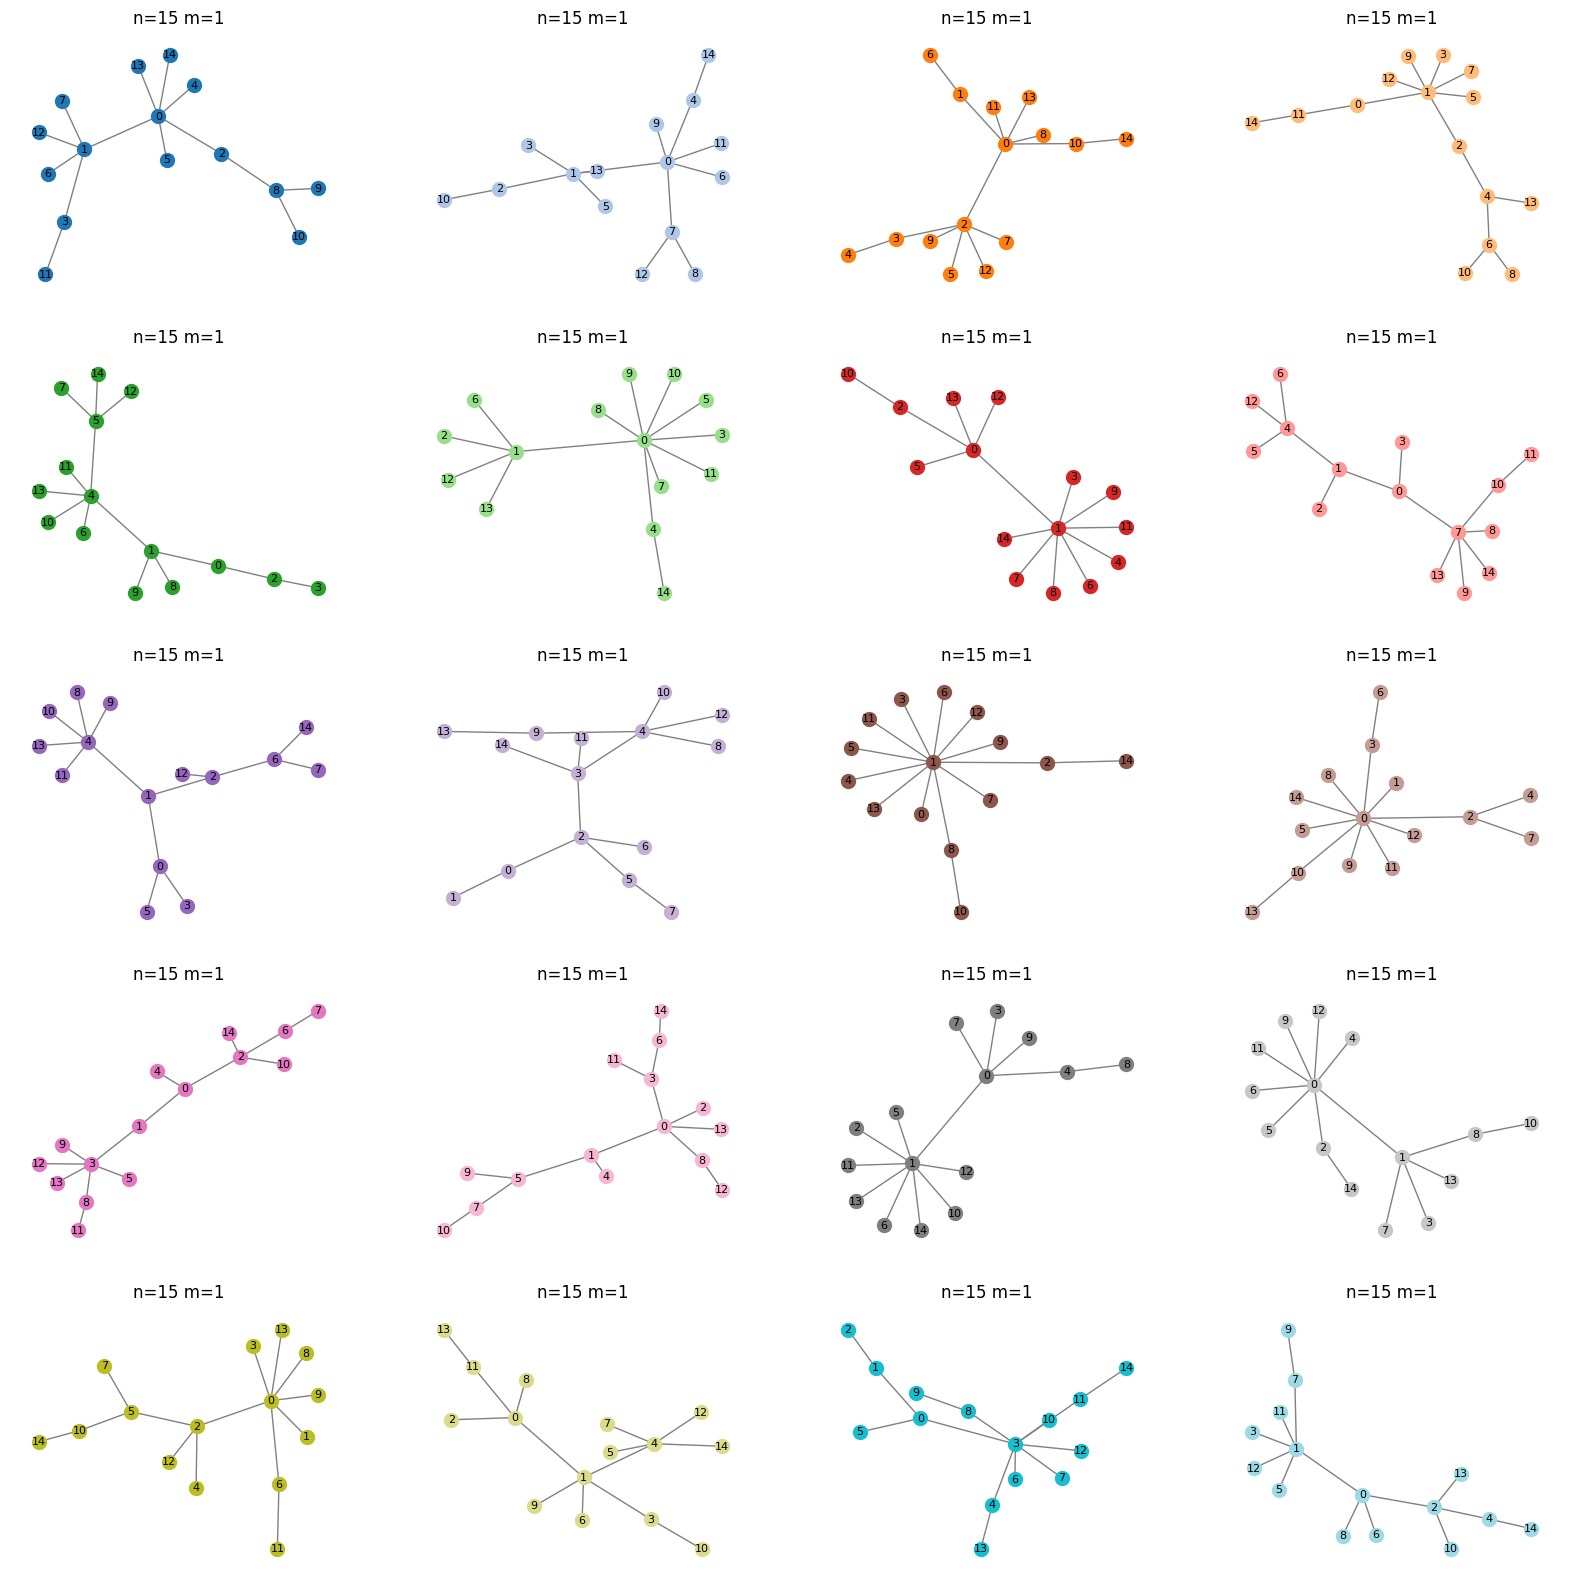

In [46]:
# The following code is just for visualisation purposes. We can plot all the graphs together:

color={}
cm = plt.get_cmap("tab20")
for i in range(20):
    color[i]=cm(i/20)


fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
ax = axes.flatten()


for i in range(20):
    nx.draw_networkx(BA_graphs[i], ax=ax[i],
                     with_labels=True, 
                     node_size=100, 
                     font_size=8, 
                     font_color="k",
                     node_color=np.atleast_2d(color[i]),
                     edge_color='grey',
                     width=1)
    ax[i].set_axis_off()
    ax[i].set_title("n=15 m=1")

plt.show()

In the figure above we can see that every graph created with the same parameters result in different configurations. 
However, we can see that in all of them there are few highly connected nodes.

# 2. Degree Distribution


__What is the shape of the degree distribution for our random graphs?__

In this section we will compute the degree distribution of the ramdom graph models and check if there is any difference between them.

For any $k$, $p(k)$ is the fraction of nodes having degree $k$.

$p(k)$  is then the probability that a randomly chosen node in the network has degree $k$. 


Degree of a node: The degree of a node in a graph is the count of edges incident to that node. In directed graphs, it's often separated into in-degree (number of incoming edges) and out-degree (number of outgoing edges). However, in undirected graphs like the ones generated by the Barabási-Albert model, we typically consider the total number of edges incident to the node, regardless of direction.

Degree Distribution: The degree distribution of a random graph model describes the probability distribution of degrees across all nodes in the graph. For a given degree k, the degree distribution provides the probability that a randomly chosen node in the network has that degree.

Shape of the Degree Distribution: The shape of the degree distribution characterizes how the probabilities of different degrees are distributed across the nodes in the graph. In real-world networks, degree distributions can take various forms, including Poisson, Gaussian, or power-law distributions. Understanding the shape of the degree distribution helps in analyzing the structure and properties of the network, such as its robustness, connectivity, and resilience to random failures or targeted attacks.

In [19]:
## Let's start by creating two random graphs using the models we just saw.

ER= nx.erdos_renyi_graph(100,0.10) 
ER.name="Erdős-Rényi graph" # Here we are naming the graph, so then when printing the graph info we can identify it 

BA= nx.barabasi_albert_graph(100,6) 
BA.name="Barabási–Albert graph"


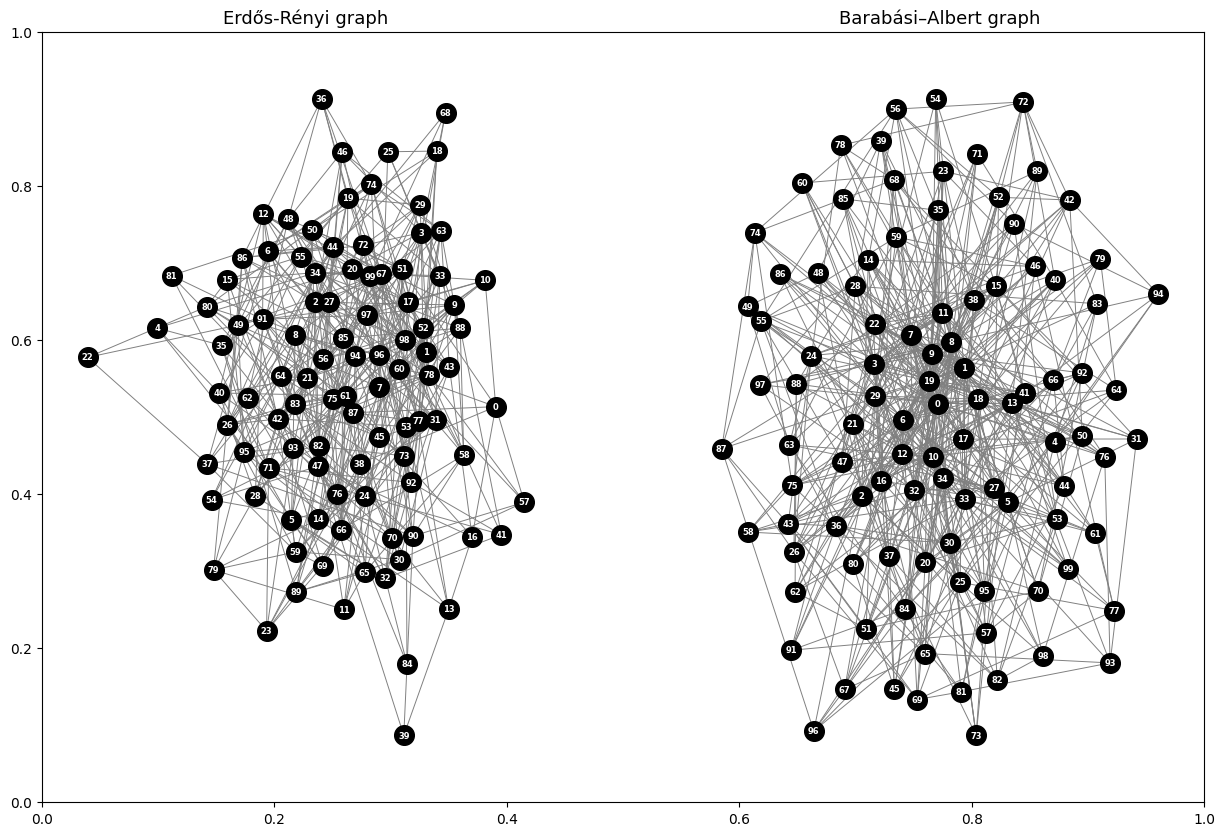

In [20]:
## Let's plot them now side by side:

fig, ax = plt.subplots(figsize=(15,10))

plt.subplot(1, 2, 1)  #this is just for plotting both graph together 
#this represents: (number of rows=1, number of columns=2, position of current plot= 1)

nx.draw(ER, 
        with_labels=True,
        node_size=200, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='grey',
        width=0.7)
plt.title("Erdős-Rényi graph",fontsize=13)



plt.subplot(1, 2, 2)
nx.draw(BA, 
        with_labels=True,
        node_size=200, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='grey',
        width=0.7)
plt.title("Barabási–Albert graph",fontsize=13)

plt.show()

They look really similar !!!

Let's print the info for each graph to see if we can find any difference between them:

In [21]:
print(ER)
print(BA)

Graph named 'Erdős-Rényi graph' with 100 nodes and 468 edges
Graph named 'Barabási–Albert graph' with 100 nodes and 564 edges


Any suprise? We have same number of nodes, and similar number of edges and average degree !! 

Let's plot the graph using the degree of each node !

In [22]:
## To compute the degree of every node in both graphs:

# Degree of any node at the Erdős-Rényi graph:
degree_ER=nx.degree(ER)

nx.set_node_attributes(ER,dict(degree_ER),'deg')
ER_deg=[(i[1]['deg']) for i in ER.nodes(data=True)] # this only keeps the degree values which we will use for the color of nodes

# Degree of any node at the Barabási–Albert graph:
degree_BA=nx.degree(BA)

nx.set_node_attributes(BA,dict(degree_BA),'deg')
BA_deg=[(i[1]['deg']) for i in BA.nodes(data=True)]




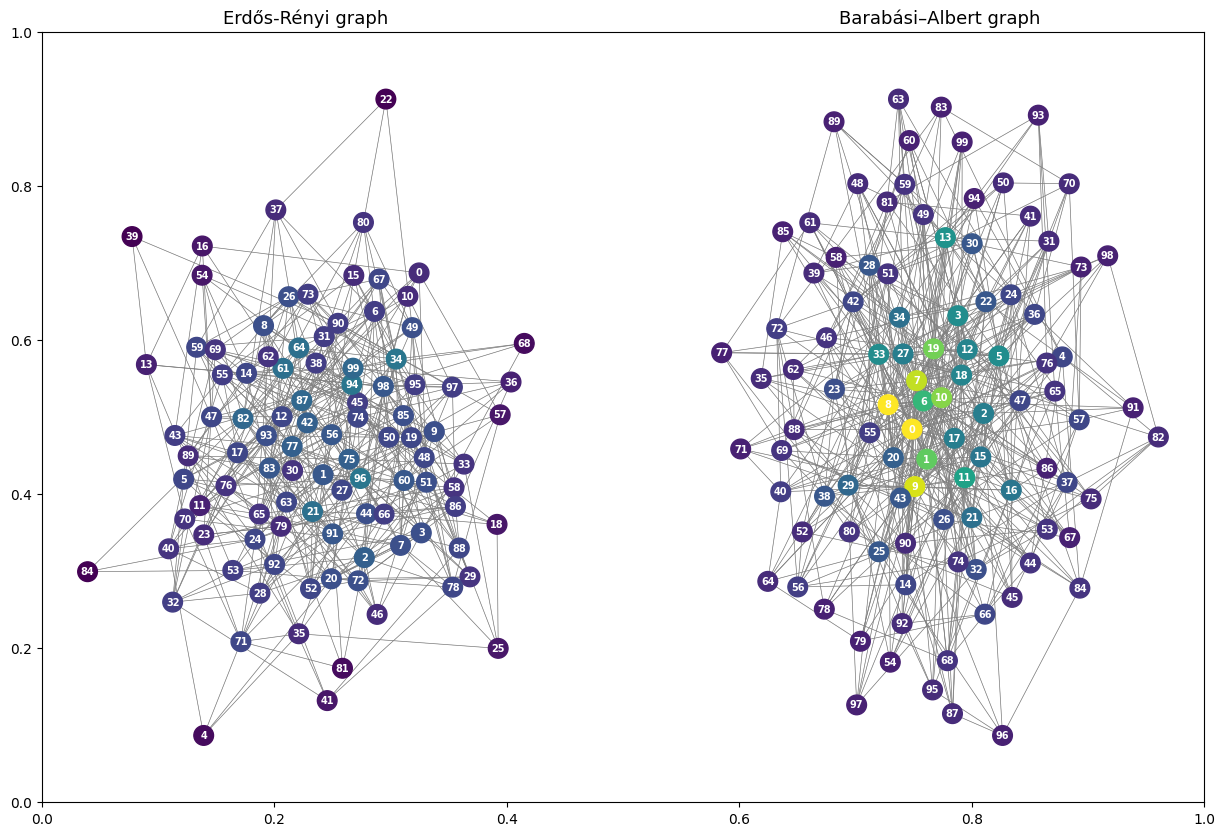

In [23]:
## To plot both graphs using the degree values for the colour of nodes:

fig, ax = plt.subplots(figsize=(15,10))


# Plot the Erdős-Rényi graph:

plt.subplot(1, 2, 1) # to plot the graphs side by side

pos_ER=nx.spring_layout(ER) # to set the possition of nodes 

nx.draw_networkx_edges(ER, 
                       pos_ER,edge_color='grey',
                       width=0.1)
nx.draw(ER, 
        pos=pos_ER,
        with_labels=True,
        node_size=200, 
        font_size=7, 
        font_color="w",
        font_weight='bold',
        node_color=ER_deg,
        vmin=min(ER_deg+BA_deg),
        vmax=max(ER_deg+BA_deg),
        edge_color='gray',
        width=0.5)
plt.title("Erdős-Rényi graph",fontsize=13)



# Plot the Barabási–Albert graph:

plt.subplot(1, 2, 2)

pos_BA=nx.spring_layout(BA)

nx.draw_networkx_edges(BA, 
                       pos_BA,edge_color='grey',
                       width=0.1)
nx.draw(BA, 
        pos=pos_BA,
        with_labels=True,
        node_size=200, 
        font_size=7, 
        font_color="w",
        font_weight='bold',
        node_color=BA_deg,
        vmin=min(ER_deg+BA_deg),
        vmax=max(ER_deg+BA_deg),
        edge_color='gray',
        width=0.5)
plt.title("Barabási–Albert graph",fontsize=13)

plt.show()


## Here we are plotting both graphs using the same range of colour values. 
## We did this by setting the "vmin" and "vmax", taking the maximum and minimum values when looking at both degree lists.


In the __Erdős-Rényi graph__ we can see that most of the nodes have the similar number of links, with no highly connected nodes.

In the __Barabási–Albert graph__ we can see many nodes with low degree values and few hubs with large number of links.

To get a better view, we have to look at the degree distribution !!! 

In [24]:
# Using the degree we already computed at each node, we are going to figure out the probability of each degree in both graphs:

# Probability of degrees in the Erdős-Rényi graph:

degree_valuesER = sorted(set(ER_deg)) # this give us the k values. It selects the unique values of the degrees in the graph
probabilityER = [round(list(ER_deg).count(i)/float(nx.number_of_nodes(ER)),4) for i in degree_valuesER]  # this give us the p(k) values

# Probability of degrees in the Barabási–Albert graph:

degree_valuesBA = sorted(set(BA_deg)) # this give us the k values. It selects the unique values of the degrees in the graph
probabilityBA = [round(list(BA_deg).count(i)/float(nx.number_of_nodes(BA)),4) for i in degree_valuesBA]# this give us the p(k) values


In [25]:
#Let's check how this looks like:
import pandas as pd
df_ER = pd.DataFrame({'k':degree_valuesER,'p(k)':probabilityER})
df_ER 

,k,p(k)
0,3,0.03
1,4,0.03
2,5,0.06
3,6,0.03
4,7,0.09
5,8,0.11
6,9,0.15
7,10,0.19
8,11,0.12
9,12,0.06


In [26]:
sum(df_ER['p(k)']) # the sum of every probability must be 1

1.0

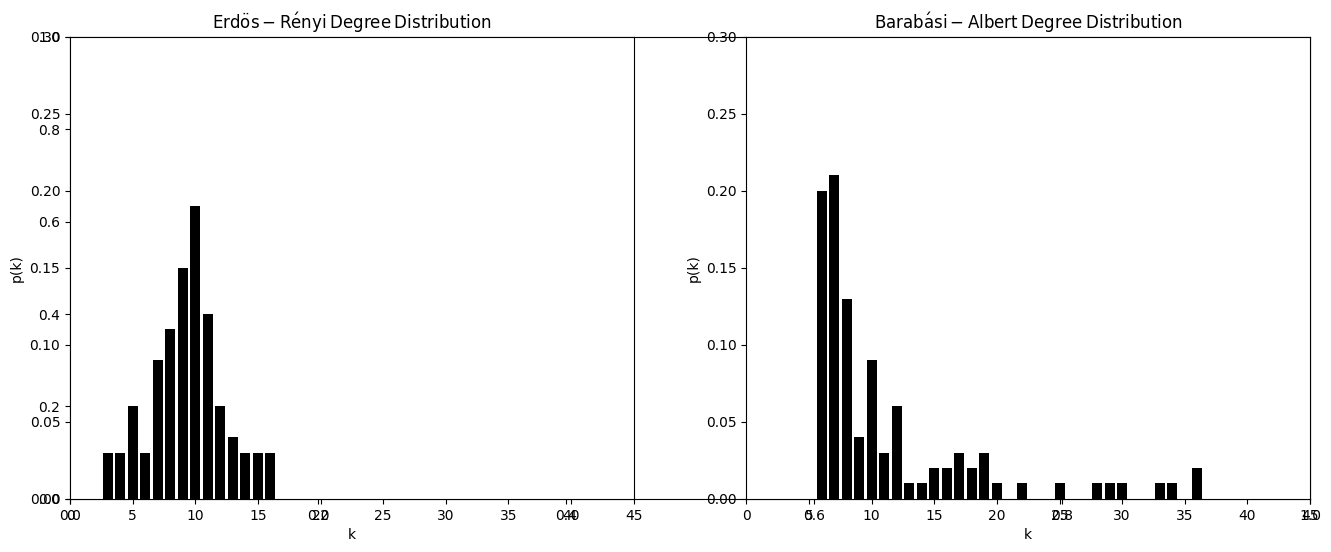

In [27]:
## Let's plot the degree distribution for each graph:

fig, ax = plt.subplots(figsize=(16,6))

#plot ER degree distribution:
plt.subplot(1, 2, 1)
plt.bar(degree_valuesER,probabilityER,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.ylim(0.00, 0.30)
plt.xlim(0, 45)
plt.title(r'$\mathrm{Erd\"os-R\'enyi\: Degree\: Distribution}$')

#plot BA degree distribution:
plt.subplot(1, 2, 2)
plt.bar(degree_valuesBA,probabilityBA,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.ylim(0.00, 0.30)
plt.xlim(0, 45)
plt.title(r'$\mathrm{Barab\'asi-Albert\: Degree\: Distribution}$')

plt.show()

By looking at the degree distribution we can see how the Erdős-Rényi graph tend towards a Poisson distribution, while the Barabási–Albert is more like a power-law distribution.



The BA model is a growth model based on preferential attachment, where new nodes are more likely to connect to existing nodes with higher degrees. This preferential attachment mechanism leads to the emergence of a small number of highly connected "hub" nodes along with a large number of nodes with lower degrees, conforming to a power-law distribution.
A power-law distribution is characterized by a few nodes having very high degrees while the majority have relatively low degrees. In the BA model, as the network grows, new nodes tend to attach to existing nodes with higher degrees, resulting in the formation of a few highly connected nodes, thus giving rise to a power-law distribution.



The ER model is a random connection model where edges are generated by randomly connecting nodes, with the probability of connection being a fixed parameter. In the ER model, each pair of nodes has a fixed probability p of forming an edge. This random connection mechanism leads to degree distributions tending toward a Poisson distribution.
A Poisson distribution is characterized by a bell-shaped curve, with most nodes having degrees close to the average degree, and very few nodes having extremely high or low degrees. In the ER model, due to the uniform probability of connection between all nodes, the degree distribution exhibits this characteristic bell-shaped curve.

Therefore, the power-law distribution observed in the BA model primarily arises from the preferential attachment mechanism, leading to the formation of a small number of highly connected nodes, while the Poisson distribution seen in the ER model stems from the uniform random connection mechanism, resulting in a more uniform degree distribution.

# 3. Random graphs and real networks

Now that we have seen two models of random graphs let's see how they compare to real networks by computing some measures.

We are going to use a Facebook network. You can download it from the [Stanford University](https://snap.stanford.edu/data/egonets-Facebook.html) site.

In [28]:
## Let's read the facebook network and create two random graphs with similar nodes and edges:

F = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
F.name="Facebook graph"
#(If it is too heavy to upload just replace this with the Karate Club network by using "nx.karate_club_graph()" and adjust the parameters of the following random graphs)

E_huge= nx.erdos_renyi_graph(4039,0.01) 
ER.name="Erdős-Rényi graph"

B_huge= nx.barabasi_albert_graph(4039,22) 
B_huge.name="Barabási–Albert graph"


print(F)
print(E_huge)
print(B_huge)

Graph named 'Facebook graph' with 4039 nodes and 88234 edges
Graph named 'Erdős-Rényi graph' with 4039 nodes and 81429 edges
Graph named 'Barabási–Albert graph' with 4039 nodes and 88374 edges


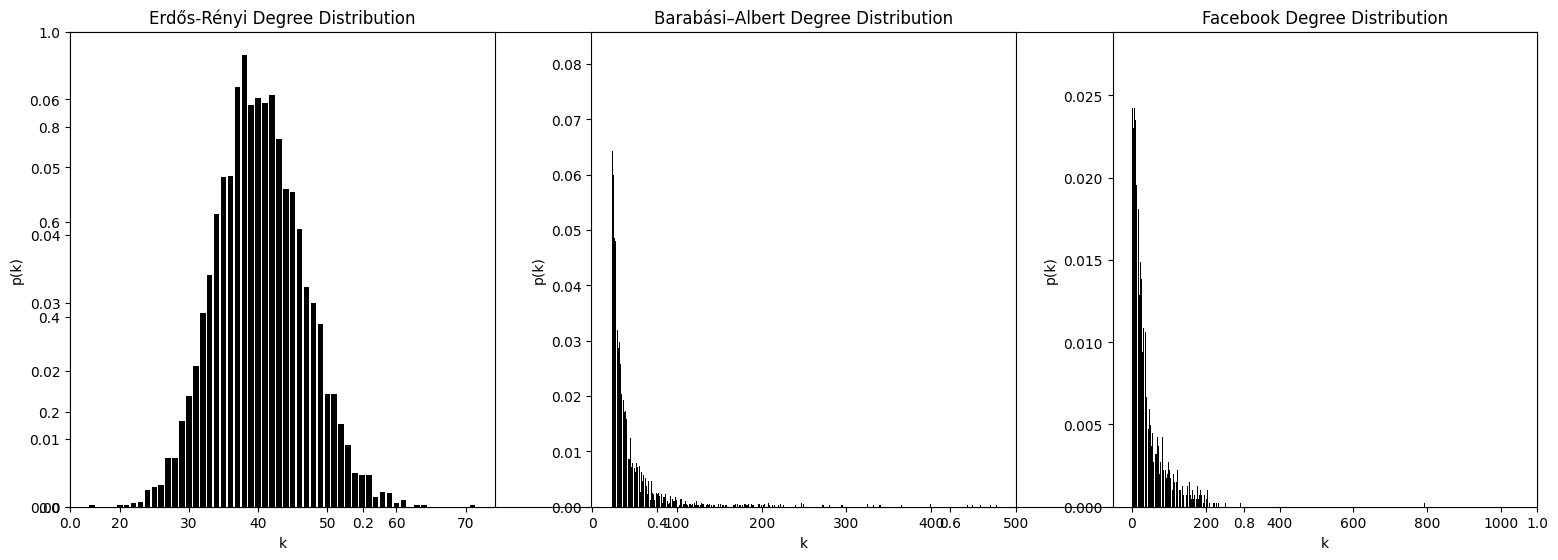

In [29]:
### Let's start by computing the degree for each graph:

degree_F=nx.degree(F)
nx.set_node_attributes(F,dict(degree_F),'deg')
F_deg=[(i[1]['deg']) for i in F.nodes(data=True)]

degree_E_huge=nx.degree(E_huge)
nx.set_node_attributes(E_huge,dict(degree_E_huge),'deg')
E_huge_deg=[(i[1]['deg']) for i in E_huge.nodes(data=True)]

degree_B_huge=nx.degree(B_huge)
nx.set_node_attributes(B_huge,dict(degree_B_huge),'deg')
B_huge_deg=[(i[1]['deg']) for i in B_huge.nodes(data=True)]


### Let's find the k and p(k):

degree_valuesE_huge = sorted(set(E_huge_deg)) # k
probabilityE_huge = [list(E_huge_deg).count(i)/float(nx.number_of_nodes(E_huge)) for i in degree_valuesE_huge] #p(k)

degree_valuesB_huge = sorted(set(B_huge_deg)) # k
probabilityB_huge = [list(B_huge_deg).count(i)/float(nx.number_of_nodes(B_huge)) for i in degree_valuesB_huge] #p(k)

degree_valuesF = sorted(set(F_deg)) # k
probabilityF = [list(F_deg).count(i)/float(nx.number_of_nodes(F)) for i in degree_valuesF] #p(k)



### To plot the three degree distribution together:

fig, ax = plt.subplots(figsize=(16,6))

#plot ER:
plt.subplot(1, 3, 1)
plt.bar(degree_valuesE_huge,probabilityE_huge,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Erdős-Rényi Degree Distribution')

#plot BA:
plt.subplot(1, 3, 2)
plt.bar(degree_valuesB_huge,probabilityB_huge,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')

plt.title('Barabási–Albert Degree Distribution')

#plot F:
plt.subplot(1, 3, 3)
plt.bar(degree_valuesF,probabilityF,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Facebook Degree Distribution')

plt.tight_layout()
plt.show()


Let's compute the clustering coefficient at each network

describes the degree of clustering or local cohesion among nodes in a network. It measures the probability of connections among a node's neighbors.

Specifically, for a node i, its clustering coefficient is defined as the ratio of the actual number of connections between its neighbors to the total possible number of connections among its neighbors. In other words, the clustering coefficient quantifies the probability of closed triangles formed among a node's neighbors.

The clustering coefficient ranges from 0 to 1. A clustering coefficient close to 1 indicates that the neighbors of a node are highly interconnected, forming tightly-knit clusters. Conversely, a clustering coefficient close to 0 indicates a lower proportion of connections among the neighbors, suggesting a more dispersed network structure.

In [30]:
#Average clustering coefficient (C):
clus_ER = nx.average_clustering(E_huge)
clus_BA = nx.average_clustering(B_huge)
clus_F = nx.average_clustering(F)

clus=[clus_ER,clus_BA,clus_F]

#Number of nodes (N):
nodes_ER= E_huge.number_of_nodes()  
nodes_BA= B_huge.number_of_nodes()  
nodes_F= F.number_of_nodes()  

nodes=[nodes_ER,nodes_BA,nodes_F]

#Number of edges (L):
edges_ER= E_huge.number_of_edges()  
edges_BA= B_huge.number_of_edges()  
edges_F= F.number_of_edges()  

edges=[edges_ER,edges_BA,edges_F]

#Average degree <k>:
from statistics import mean

av_deg_ER= mean(E_huge_deg) 
av_deg_BA= mean(B_huge_deg) 
av_deg_F= mean(F_deg)

av_deg=[av_deg_ER,av_deg_BA,av_deg_F]

name=['Erdős-Rényi','Barabási–Albert', 'Facebook']

In [31]:
df_all = pd.DataFrame({'Networks':name,'N':nodes,'L':edges,'<k>':av_deg,'C':clus})
df_all

,Networks,N,L,<k>,C
0,Erdős-Rényi,4039,81429,40.321367,0.009953
1,Barabási–Albert,4039,88374,43.760337,0.038059
2,Facebook,4039,88234,43.691013,0.605547


We can see that real networks have a much higher clustering coefficient than random networks of similar N and L

In [32]:
##### IMPORTANT !

# when we work with random graphs we need to run many different samples and use the average properties.
# In the previous case we didn't do it for time processing reasons.
# We should have done something like this for computing the average clustering coefficient of the BA model:

G = [nx.barabasi_albert_graph(4039,22)  for _ in range(10)] # Here we are only running this 10 times, but you should do it many more
C = [nx.average_clustering(i) for i in G]

C

## This is going to take some time....

[0.03782768332010857,
 0.037229219416345646,
 0.0375234055456866,
 0.037938767819580714,
 0.037800297111934104,
 0.037256445575322296,
 0.03689860704459289,
 0.03878154183226198,
 0.03777013112290508,
 0.03586645640595774]

The reason for generating multiple instances of the graph is to obtain a more robust estimate of the average clustering coefficient. Random graph models like the Barabási-Albert model can exhibit variability across different realizations due to their stochastic nature. By averaging the clustering coefficients over multiple instances, we obtain a more reliable estimate of the average behavior of the model.

In [47]:
CC=sum(C)/len(C) # we should have used this value !
CC

0.037489255519469564

# 4. Small world

High Clustering Coefficient:

Clustering coefficient measures the extent to which nodes in a network tend to cluster together. In a small-world network, nodes are highly interconnected, meaning that their neighbors are often connected to each other as well. This results in a high clustering coefficient, indicating a high level of local cohesion or clustering.

Short Average Path Length:

Average path length measures the average number of steps it takes to traverse from one node to another in the network. In a small-world network, even though nodes are densely connected locally, there exist short paths that connect distant nodes in the network. As a result, the average path length between any pair of nodes is relatively short compared to the size of the network.

Characteristics:

Small-world networks exhibit a "small-world effect," where despite the large size of the network, any two nodes are typically connected by a short path of intermediate nodes.
They combine features of regular networks (high clustering) and random networks (short average path length).
Small-world networks are often found in various real-world systems, including social networks, biological networks, technological networks (such as the Internet), and transportation networks.
They are resilient to random node failures due to redundant connections, yet vulnerable to targeted attacks on highly connected nodes, known as "hubs."

Generation:


Small-world networks can be generated using models such as the Watts-Strogatz model, which starts with a regular lattice structure and introduces random rewiring of edges to create shortcuts between distant nodes while preserving local clustering.

Applications:

Small-world networks have implications in various fields, including epidemiology (spread of diseases), social sciences (information dissemination), neuroscience (brain networks), and computer science (communication networks).
In summary, small-world networks are characterized by a balance between local clustering and global connectivity, making them efficient for information dissemination and resilient to certain types of network disruptions. They represent a fundamental concept in network science with widespread applications in diverse fields.

## Watts Strogatz model

We will now produce graphs with small-world properties by using the Watts-Strogatz model.

exhibit both high clustering coefficients like regular networks and short average path lengths like random networks

In [48]:
? nx.watts_strogatz_graph

Signature:
 nx.watts_strogatz_graph(
    n,
    k,
    p,
    seed=None,
    *,
    backend=None,
    **backend_kwargs,
)
Docstring:
Returns a Watts–Strogatz small-world graph.

Parameters
----------
n : int
    The number of nodes
k : int
    Each node is joined with its `k` nearest neighbors in a ring
    topology.
p : float
    The probability of rewiring each edge
seed : integer, random_state, or None (default)
    Indicator of random number generation state.
    See :ref:`Randomness<randomness>`.

See Also
--------
newman_watts_strogatz_graph
connected_watts_strogatz_graph

Notes
-----
First create a ring over $n$ nodes [1]_.  Then each node in the ring is joined
to its $k$ nearest neighbors (or $k - 1$ neighbors if $k$ is odd).
Then shortcuts are created by replacing some edges as follows: for each
edge $(u, v)$ in the underlying "$n$-ring with $k$ nearest neighbors"
with probability $p$ replace it with a new edge $(u, w)$ with uniformly
random choice of existing node $w$.

In co

In [49]:
### nx.nx.watts_strogatz_graph(n, k, p)
# Returns a Watts–Strogatz small-world graph.

### Parameters:
# n (int) – The number of nodes to be created
# k (int) – Each node is joined with its 'k' nearest neighbors in a ring topology.
# p (float) – The probability of rewiring each edge
# This parameter controls the randomness of the network. 
# When p is low, the network retains more of its original ring structure, while higher values of p result in more random connections.

Clustering Coefficient: Calculate the average clustering coefficient of the network using nx.average_clustering(). A high average clustering coefficient indicates a high degree of local clustering.

Average Shortest Path Length: Compute the average shortest path length of the network using nx.average_shortest_path_length(). A short average path length suggests efficient global connectivity.

Comparison with Random and Regular Networks: Compare the clustering coefficient and average shortest path length of the small-world network with those of random and regular networks of the same size. This helps in identifying the small-world properties of the network.

For example, increasing p while keeping k constant can lead to a transition from a regular to a small-world network, characterized by a decrease in the average shortest path length while maintaining a high clustering coefficient.

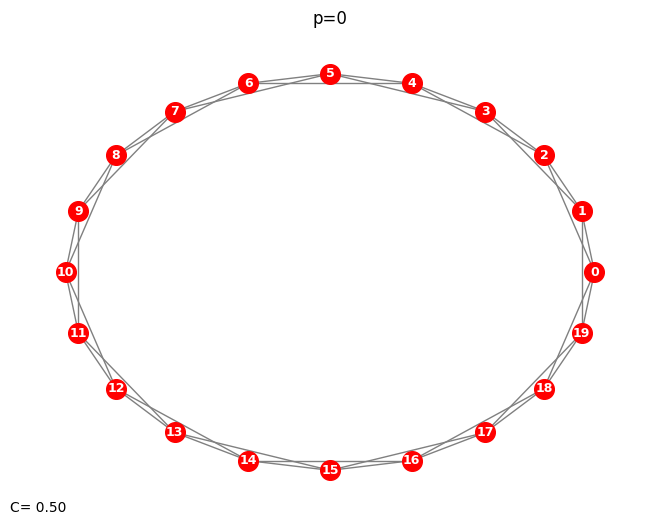

In [36]:
WS_1=nx.watts_strogatz_graph(20, 4,0)

# Here we are creating a graph with a rewire probability of 0. The original graph is unchanged


C_1=nx.average_clustering(WS_1)


pos=nx.circular_layout(WS_1)

nx.draw(WS_1, 
        pos=pos,
        with_labels=True,
        node_size=200, 
        font_size=9, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='gray',
        width=1) 
plt.title('p=0')
plt.figtext(0,0,'C= %.2f'%(C_1))



plt.show()

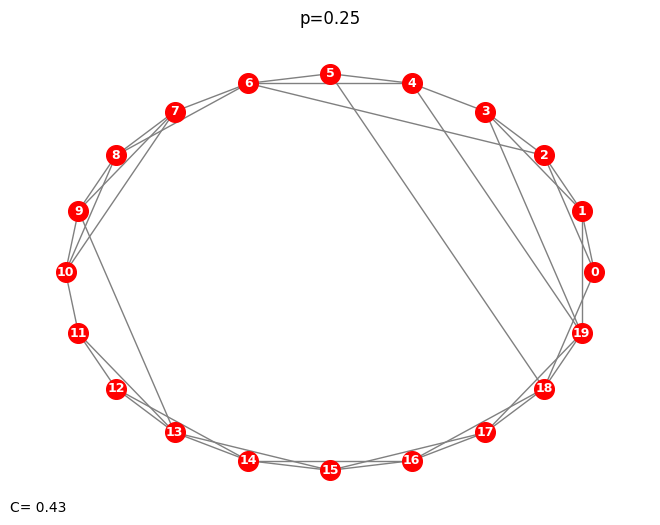

In [37]:
WS_2=nx.watts_strogatz_graph(20, 4,0.25)

# A graph with a rewire probability of 0.25

pos=nx.circular_layout(WS_2)

C_2=nx.average_clustering(WS_2)

nx.draw(WS_2, 
        pos=pos,
        with_labels=True,
        node_size=200, 
        font_size=9, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='gray',
        width=1) 
plt.title('p=0.25')
plt.figtext(0,0,'C= %.2f'%(C_2))
plt.show()

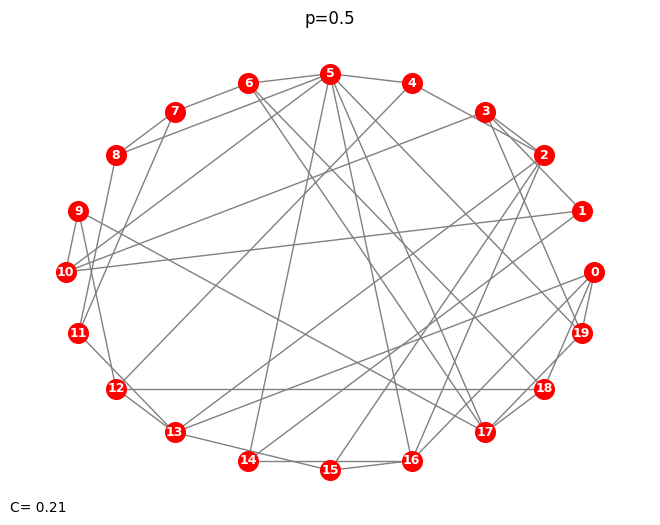

In [38]:
WS_3=nx.watts_strogatz_graph(20, 4,0.5)

# A graph with a rewire probability of 0.5

C_3=nx.average_clustering(WS_3)

pos=nx.circular_layout(WS_3)

nx.draw(WS_3, 
        pos=pos,
        with_labels=True,
        node_size=200, 
        font_size=9, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='gray',
        width=1) 
plt.title('p=0.5')
plt.figtext(0,0,'C= %.2f'%(C_3))
plt.show()

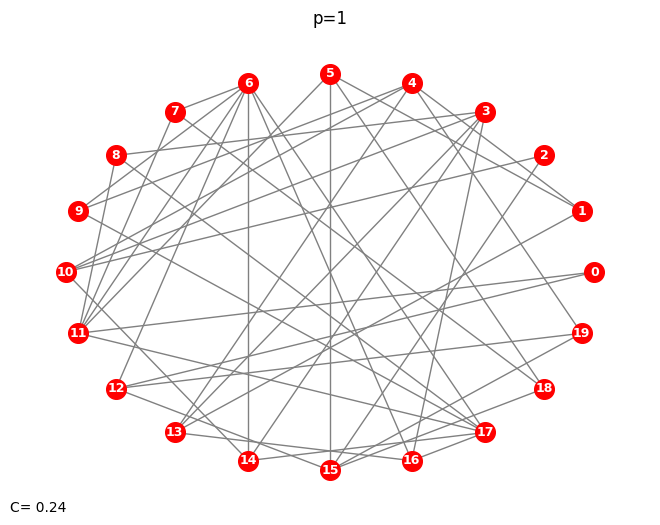

In [39]:
WS_4=nx.watts_strogatz_graph(20, 4, 1)

# A graph with a rewire probability of 1. All edges are rewired randomly.

pos=nx.circular_layout(WS_4)

C_4=nx.average_clustering(WS_4)

nx.draw(WS_4, 
        pos=pos,
        with_labels=True,
        node_size=200, 
        font_size=9, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='gray',
        width=1) 
plt.title('p=1')
plt.figtext(0,0,'C= %.2f'%(C_4))
plt.show()

Let's see how different graphs compare in terms of __clustering coefficient__ and __average shortest paths__.

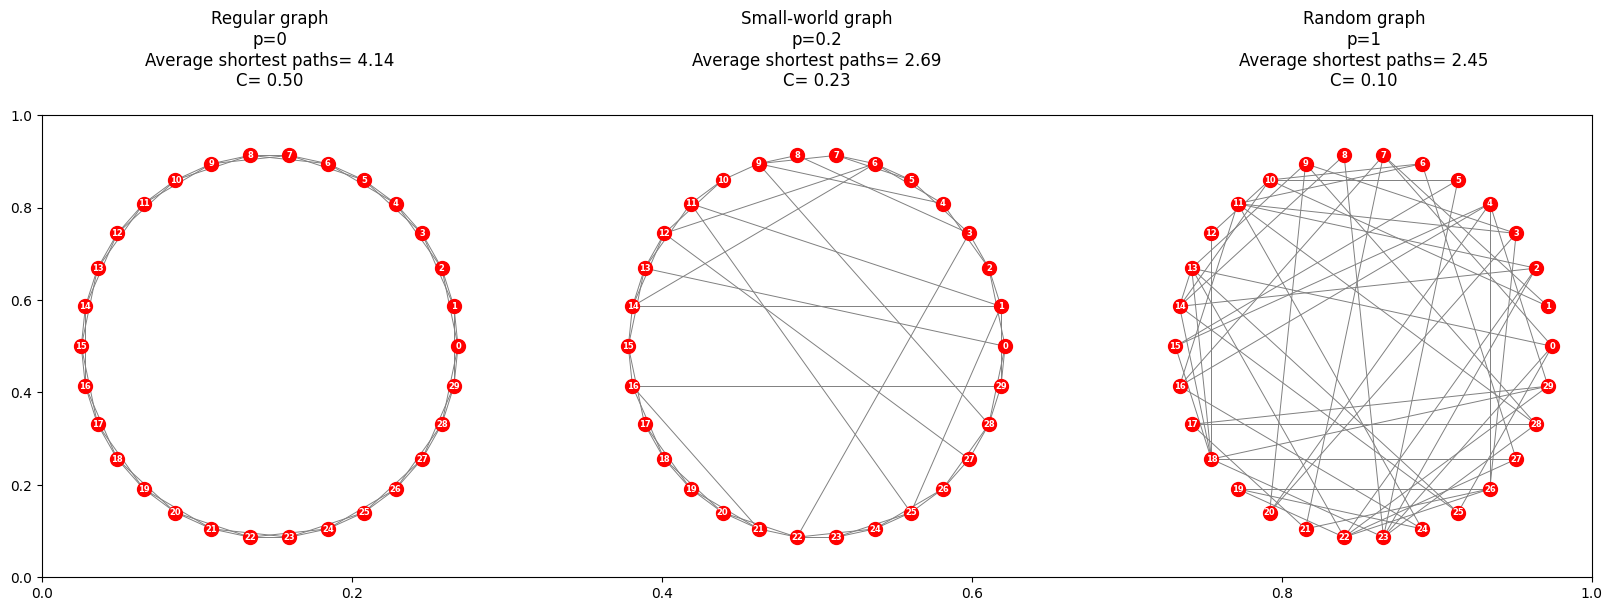

In [40]:
###### Let's start by creating the graphs and computing both measures:


#Graph 1:
WS_a=nx.watts_strogatz_graph(30, 4, 0)

WS_a_sp=nx.average_shortest_path_length(WS_a)
WS_a_c=nx.average_clustering(WS_a)


#Graph 2:
WS_b=nx.watts_strogatz_graph(30, 4, 0.2)

WS_b_sp=nx.average_shortest_path_length(WS_b)
WS_b_c=nx.average_clustering(WS_b)


#Graph 3:
WS_c=nx.watts_strogatz_graph(30, 4, 1)

WS_c_sp=nx.average_shortest_path_length(WS_c)
WS_c_c=nx.average_clustering(WS_c)


###### Let's plot the graph with the measures we computed:
fig, ax = plt.subplots(figsize=(20,6))

pos=nx.circular_layout(WS_a)

plt.subplot(1, 3, 1) 
nx.draw(WS_a, 
        pos=pos,
        with_labels=True,
        node_size=100, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='grey',
        width=0.7)
plt.title('Regular graph\np=0\nAverage shortest paths= %.2f\nC= %.2f\n'%(WS_a_sp, WS_a_c))

plt.subplot(1, 3, 2)
nx.draw(WS_b, 
        pos=pos,
        with_labels=True,
        node_size=100, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='grey',
        width=0.7)
plt.title('Small-world graph\np=0.2\nAverage shortest paths= %.2f\nC= %.2f\n'%(WS_b_sp, WS_b_c))

plt.subplot(1, 3, 3)
nx.draw(WS_c, 
        pos=pos,
        with_labels=True,
        node_size=100, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='grey',
        width=0.7)
plt.title('Random graph\np=1\nAverage shortest paths= %.2f\nC= %.2f\n'%(WS_c_sp, WS_c_c))

plt.show()

Here we can see that the __Small-world graph__ has larger clustering coefficient than the __Random graph__ and lower average shortest paths than __Regular graphs__.

__QUICK Exercise!__

Use the Tube network from the previous practicals and create an Erdős-Rényi and Barabási–Albert graph with the same number of elements. Compare the 3 graphs based on their degree distribution and reflect on the outputs.